In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

In [39]:
telco = pd.read_csv('data/telco.csv')

In [40]:
#Leave	가입해지여부(1이면 해지)
#MemberWeeks	가입기간
#NewContract	가입갱신여부(1이면 갱신)
#IsData	데이터요금제사용여부(1이면 사용)
#DataAmount	데이터사용량(GB)
#Callcenter	고객센터전화량
#CalMins	월평균전화량(분)
#CalCounts	월평균전화수(횟수)
#MonthlyFee	월평균요금
#OverFee	초과요금
#RoamingMin	로밍시간(분)

In [41]:
telco

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [42]:
telco.dtypes

Leave            int64
MemberWeeks      int64
NewContract      int64
IsData           int64
DataAmount     float64
Callcenter       int64
CalMins        float64
CalCounts        int64
MonthlyFee     float64
OverFee        float64
RoamingMin     float64
dtype: object

In [43]:
member = [
    'Leave',
    'MemberWeeks'
]
mem = telco.loc[:, member]

In [44]:
mem_df =mem['MemberWeeks'].mean()
print(mem_df)

101.06480648064806


In [45]:
mem.groupby(['Leave'], as_index=False).mean()

,Leave,MemberWeeks
0,0,100.793684
1,1,102.664596


In [46]:
(
    telco
    .groupby('NewContract')
    .agg({'MemberWeeks':'mean'})
)
#가입해지여부에 대한 가입기간을 평균을 내었을때, 해지한 이용자나 갱신한 이용자의 차이는 별로 없다.
#가입갱신여부에 대한 가입기간을 평균을 내었을때에도 차이는 별로 없다. 
#갱신과 해지하는 이용자들은 해당 통신사의 이용기간이 별차이 없는 것으로 분석된다.

,MemberWeeks
NewContract,
0,104.071207
1,100.742193


In [47]:
(
    telco
    .groupby(['IsData'])
    .agg({'DataAmount':['sum','mean','size'],
           'CalMins':['sum','mean'],
           'CalCounts': ['sum'],
           'MonthlyFee': ['mean'],
           'OverFee' :['sum','mean']})
)
#데이터요금재사용여부 에따른 이용자들의 데이터사용량, 월평균전화량, 월평균전화수, 월평균 요금, 초과요금의 총합, 평균, 비율을 분석하였다.
#데이터요금을 재사용하지 않는 이용자들은 데이터의 총합이 173으로 평균적으로 1기가도 사용하지 않는 모습을 보인다.
#데이터사용자보다 더많은 전화사용량과 전화횟수를 보이고 있지만, 평균을 보았을 때는 별 차이가 없는것으로 보인다.
#월평균금액과 초과요금을 보았을 때, 월평균 요금은 데이터를 사용하지 않는 이용자들이  27.076634으로 저렴하다.
#초과요금의 총합을 보았을 때, 데이터요금을 사용하지않는 이용자들의 총합이 엄청 많은 것을 볼 수 있다.
#하지만, 평균을 내면 데이터요금을 재사용하는 이용자들이 0.122정도 차이나는 것을 볼 수 있다.
#평균을 내었을 때는 별차이가 없지만, 총합을 통해 데이터를 재사용하지 않는 이용자들은 전화사용량이 더 많은 것을 알 수 있고,
#초과금액이 많이 나오는 것을 알 수 있다.
#데이터요금 재사용자들은 데이터를 사용하며 평균적으로 2.7GB의 데이터를 사용하고, 상대적으로 전화사용량과 초과요금의 금액이 적은 것을 볼 수 있다.

DataAmount                   CalMins             CalCounts MonthlyFee  \
              sum      mean  size       sum        mean       sum       mean   
IsData                                                                         
0          173.80  0.072086  2411  433574.5  179.831813    242482  48.815015   
1         2547.51  2.763026   922  165615.9  179.626790     92270  75.891649   

         OverFee            
             sum      mean  
IsData                      
0       24152.77  10.01774  
1        9348.84  10.13974

Text(0.5, 1.0, '데이터 사용량에 따른 월평균 요금')

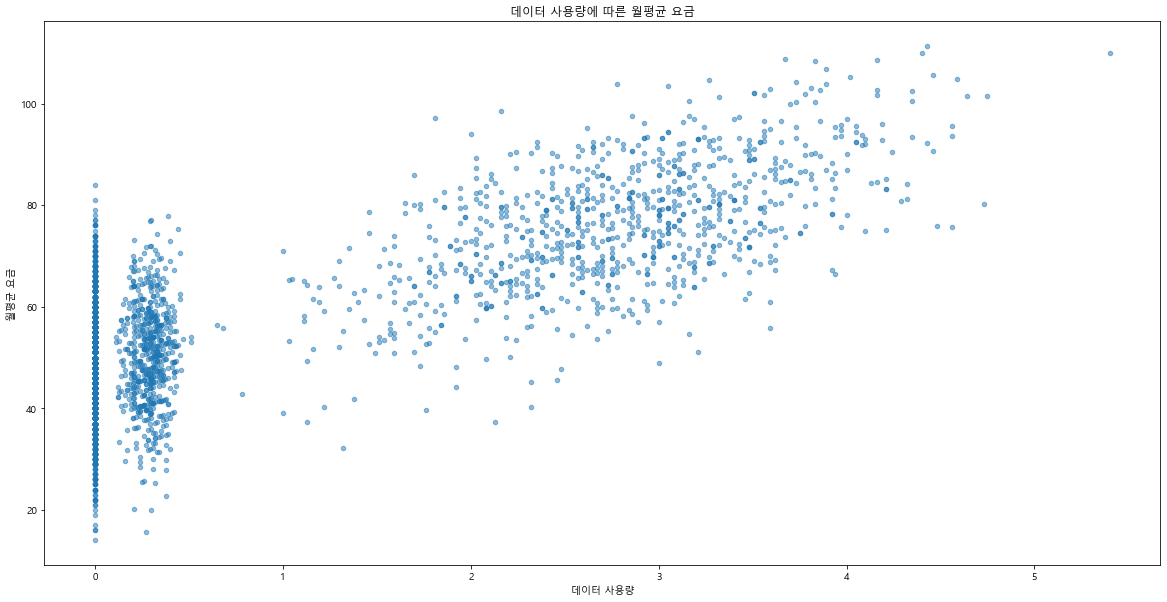

In [64]:

fig, ax = plt.subplots(figsize=(20, 10))
telco.plot.scatter(
    x='DataAmount',
    y='MonthlyFee',
    alpha=.5,
    ax=ax
)
plt.xlabel('데이터 사용량')
plt.ylabel('월평균 요금')
plt.title('데이터 사용량에 따른 월평균 요금')
#데이터 사용량에 따른 월평균 요금을 산점도로 표현하였다.
#alpha를 통해 투명도를 넣어 색이 진한 곳일 수록 이용자들이 많이 밀집되어 있는 것을 볼 수 있다.

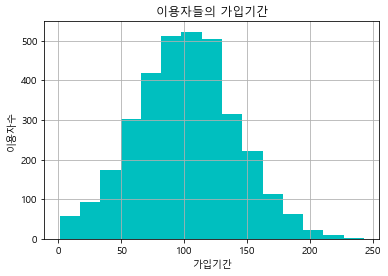

In [63]:
plt.hist(telco['MemberWeeks'], color='c',bins= 15) #bins을 통해 x축의 계급 구간을 10단계로 지정하여 세밀하게 볼 수 있게 하였다.
plt.title('이용자들의 가입기간')
plt.xlabel('가입기간')
plt.ylabel('이용자수')
plt.grid()
plt.show()


#이용자들이 가장 많은 가입기간은 100주정도 이며, 최고 장기 가입이용자는 230주를 넘는 것을 볼 수 있다.